# Usage

In [1]:
cd ../tests/nek

/home/avmo/src/snek5000/pymech/tests/nek


## `pymech.neksuite`

In [2]:
from pymech.neksuite import readnek

field = readnek('channel3D_0.f00001')

Available attributes

In [3]:
[attr for attr in dir(field) if not attr.startswith('__')]

['check_connectivity',
 'elem',
 'endian',
 'istep',
 'lims',
 'lr1',
 'nbc',
 'ncurv',
 'ndim',
 'nel',
 'time',
 'var',
 'wdsz']

Majority of the attributes store metadata, such as:

- endian
- iteration
- element shape / polynomial order
- boundary conditions
- curvature
- number of dimensions
- number of elements
- time
- number of variables in (X: positions, U: velocities, P: pressure, T: temperature, S: scalars)
- word size / precision

In [4]:
print(field.endian, field.istep, field.lr1, field.nbc, field.ncurv, field.ndim, field.nel, field.time, field.var, field.wdsz)

little 10 [8, 8, 8] 0 [] 3 512 0.2 [3, 3, 1, 0, 0] 4


The `elem` attribute contains data of physical fields. It is an array of lists, with each array representing an element.

In [5]:
print("There are", len(field.elem), "elements in this file")

There are 512 elements in this file


In [6]:
first_element = field.elem[0]
print("Type =", type(first_element))

Type = <class 'pymech.exadata.elem'>


Let us look at the attributes of an element

In [7]:
[attr for attr in dir(first_element) if not attr.startswith('__')]

['bcs', 'ccurv', 'curv', 'pos', 'pres', 'scal', 'temp', 'vel']

Except for the following attributes of an element object

In [8]:
print(first_element.bcs, first_element.ccurv, first_element.curv)

[] ['', '', '', '', '', '', '', '', '', '', '', ''] [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


it contains large arrays 

In [9]:
print("Shape of element velocity and pressure arrays = ", first_element.vel.shape, first_element.pres.shape)

Shape of element velocity and pressure arrays =  (3, 8, 8, 8) (1, 8, 8, 8)


## `pymech.dataset`

In [10]:
from pymech.dataset import open_dataset

ds = open_dataset('channel3D_0.f00001')

This function loads the field file in a more convenient [xarray](https://xarray.pydata.org) dataset.

In [11]:
ds

<xarray.Dataset>
Dimensions:   (x: 64, y: 64, z: 64)
Coordinates:
  * x         (x) float64 0.0 0.05037 0.1603 0.3105 ... 5.973 6.123 6.233 6.283
  * y         (y) float64 -1.0 -0.9974 -0.9918 -0.9842 ... 0.9918 0.9974 1.0
  * z         (z) float64 0.0 0.02518 0.08017 0.1553 ... 2.986 3.061 3.116 3.142
    time      float64 0.2
Data variables:
    xmesh     (z, y, x) float64 0.0 0.05037 0.1603 0.3105 ... 6.123 6.233 6.283
    ymesh     (z, y, x) float64 -1.0 -1.0 -1.0 -1.0 -1.0 ... 1.0 1.0 1.0 1.0 1.0
    zmesh     (z, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 3.142 3.142 3.142 3.142
    ux        (z, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    uy        (z, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    uz        (z, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    pressure  (z, y, x) float64 0.004913 0.0467 0.0195 ... 0.03768 0.0761

The dataset is more descriptive and useful for exploratory work, such as post-processing and plotting.

### Computing statistics

Calculate median for all variables

In [12]:
ds.median()

<xarray.Dataset>
Dimensions:   ()
Coordinates:
    time      float64 0.2
Data variables:
    xmesh     float64 3.142
    ymesh     float64 0.0
    zmesh     float64 1.571
    ux        float64 0.8375
    uy        float64 0.0
    uz        float64 0.0
    pressure  float64 0.0001238

### Slicing

Slice by index:

In [13]:
ds.ux.isel(z=32)

<xarray.DataArray 'ux' (y: 64, x: 64)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.006773  , 0.01130644, 0.01251847, ..., 0.01209086, 0.01235788,
        0.006773  ],
       [0.02467888, 0.03595118, 0.03948131, ..., 0.03794473, 0.03727177,
        0.02467888],
       ...,
       [0.03804531, 0.0281054 , 0.03863081, ..., 0.03893135, 0.04252424,
        0.03804531],
       [0.01240053, 0.00786791, 0.01261182, ..., 0.01296887, 0.01406241,
        0.01240053],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])
Coordinates:
  * x        (x) float64 0.0 0.05037 0.1603 0.3105 ... 5.973 6.123 6.233 6.283
  * y        (y) float64 -1.0 -0.9974 -0.9918 -0.9842 ... 0.9918 0.9974 1.0
    z        float64 1.571
    time     float64 0.2

It is also possible to slice by value using `sel` method

### Visualizing

Average in spanwise (`z`) direction and plot velocity profile

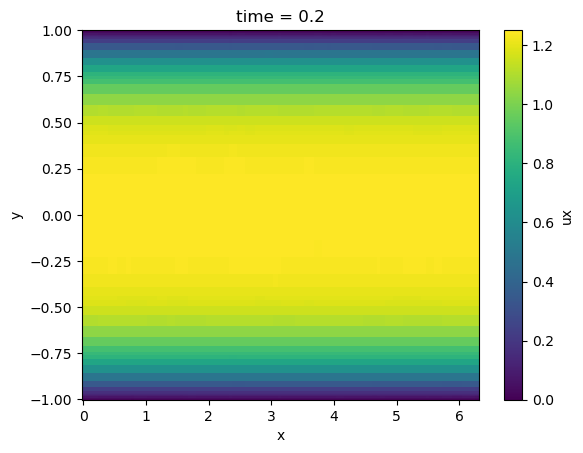

In [14]:
ds.ux.mean('z').plot()

Average in both horizontal direction and plot 1D profile

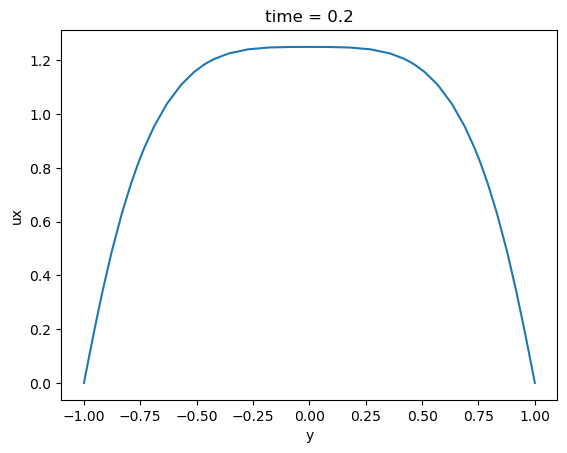

In [15]:
ds_1d = ds.mean(['x', 'z'])
ds_1d.ux.plot()

It is also worth knowing that it is possible to:

- Parallelize these operations using `ds.chunk` method followed by `ds.compute`
- Open a multiple files into a single dataset using `pymech.dataset.open_mfdataset`, optionally in parallel.

Read the [xarray documentation](https://xarray.pydata.org/en/stable/quick-overview.html) to see how to use them.